In [1]:
using Plots

include("src/Simulation.jl")
using .Simulation: ModelProperties, initialize_model, set_θ_mat!

Julia: 1.10.2
Number of threads: 12


In [2]:
default(
    fontfamily="Arial",
    titlefontsize=16,
    guidefontsize=14,
    tickfontsize=11,
    legendfontsize=11,
    margin=5Plots.mm,
    dpi=600,
    lw=2.0,
);

EV sample 1: [(100, 100)]


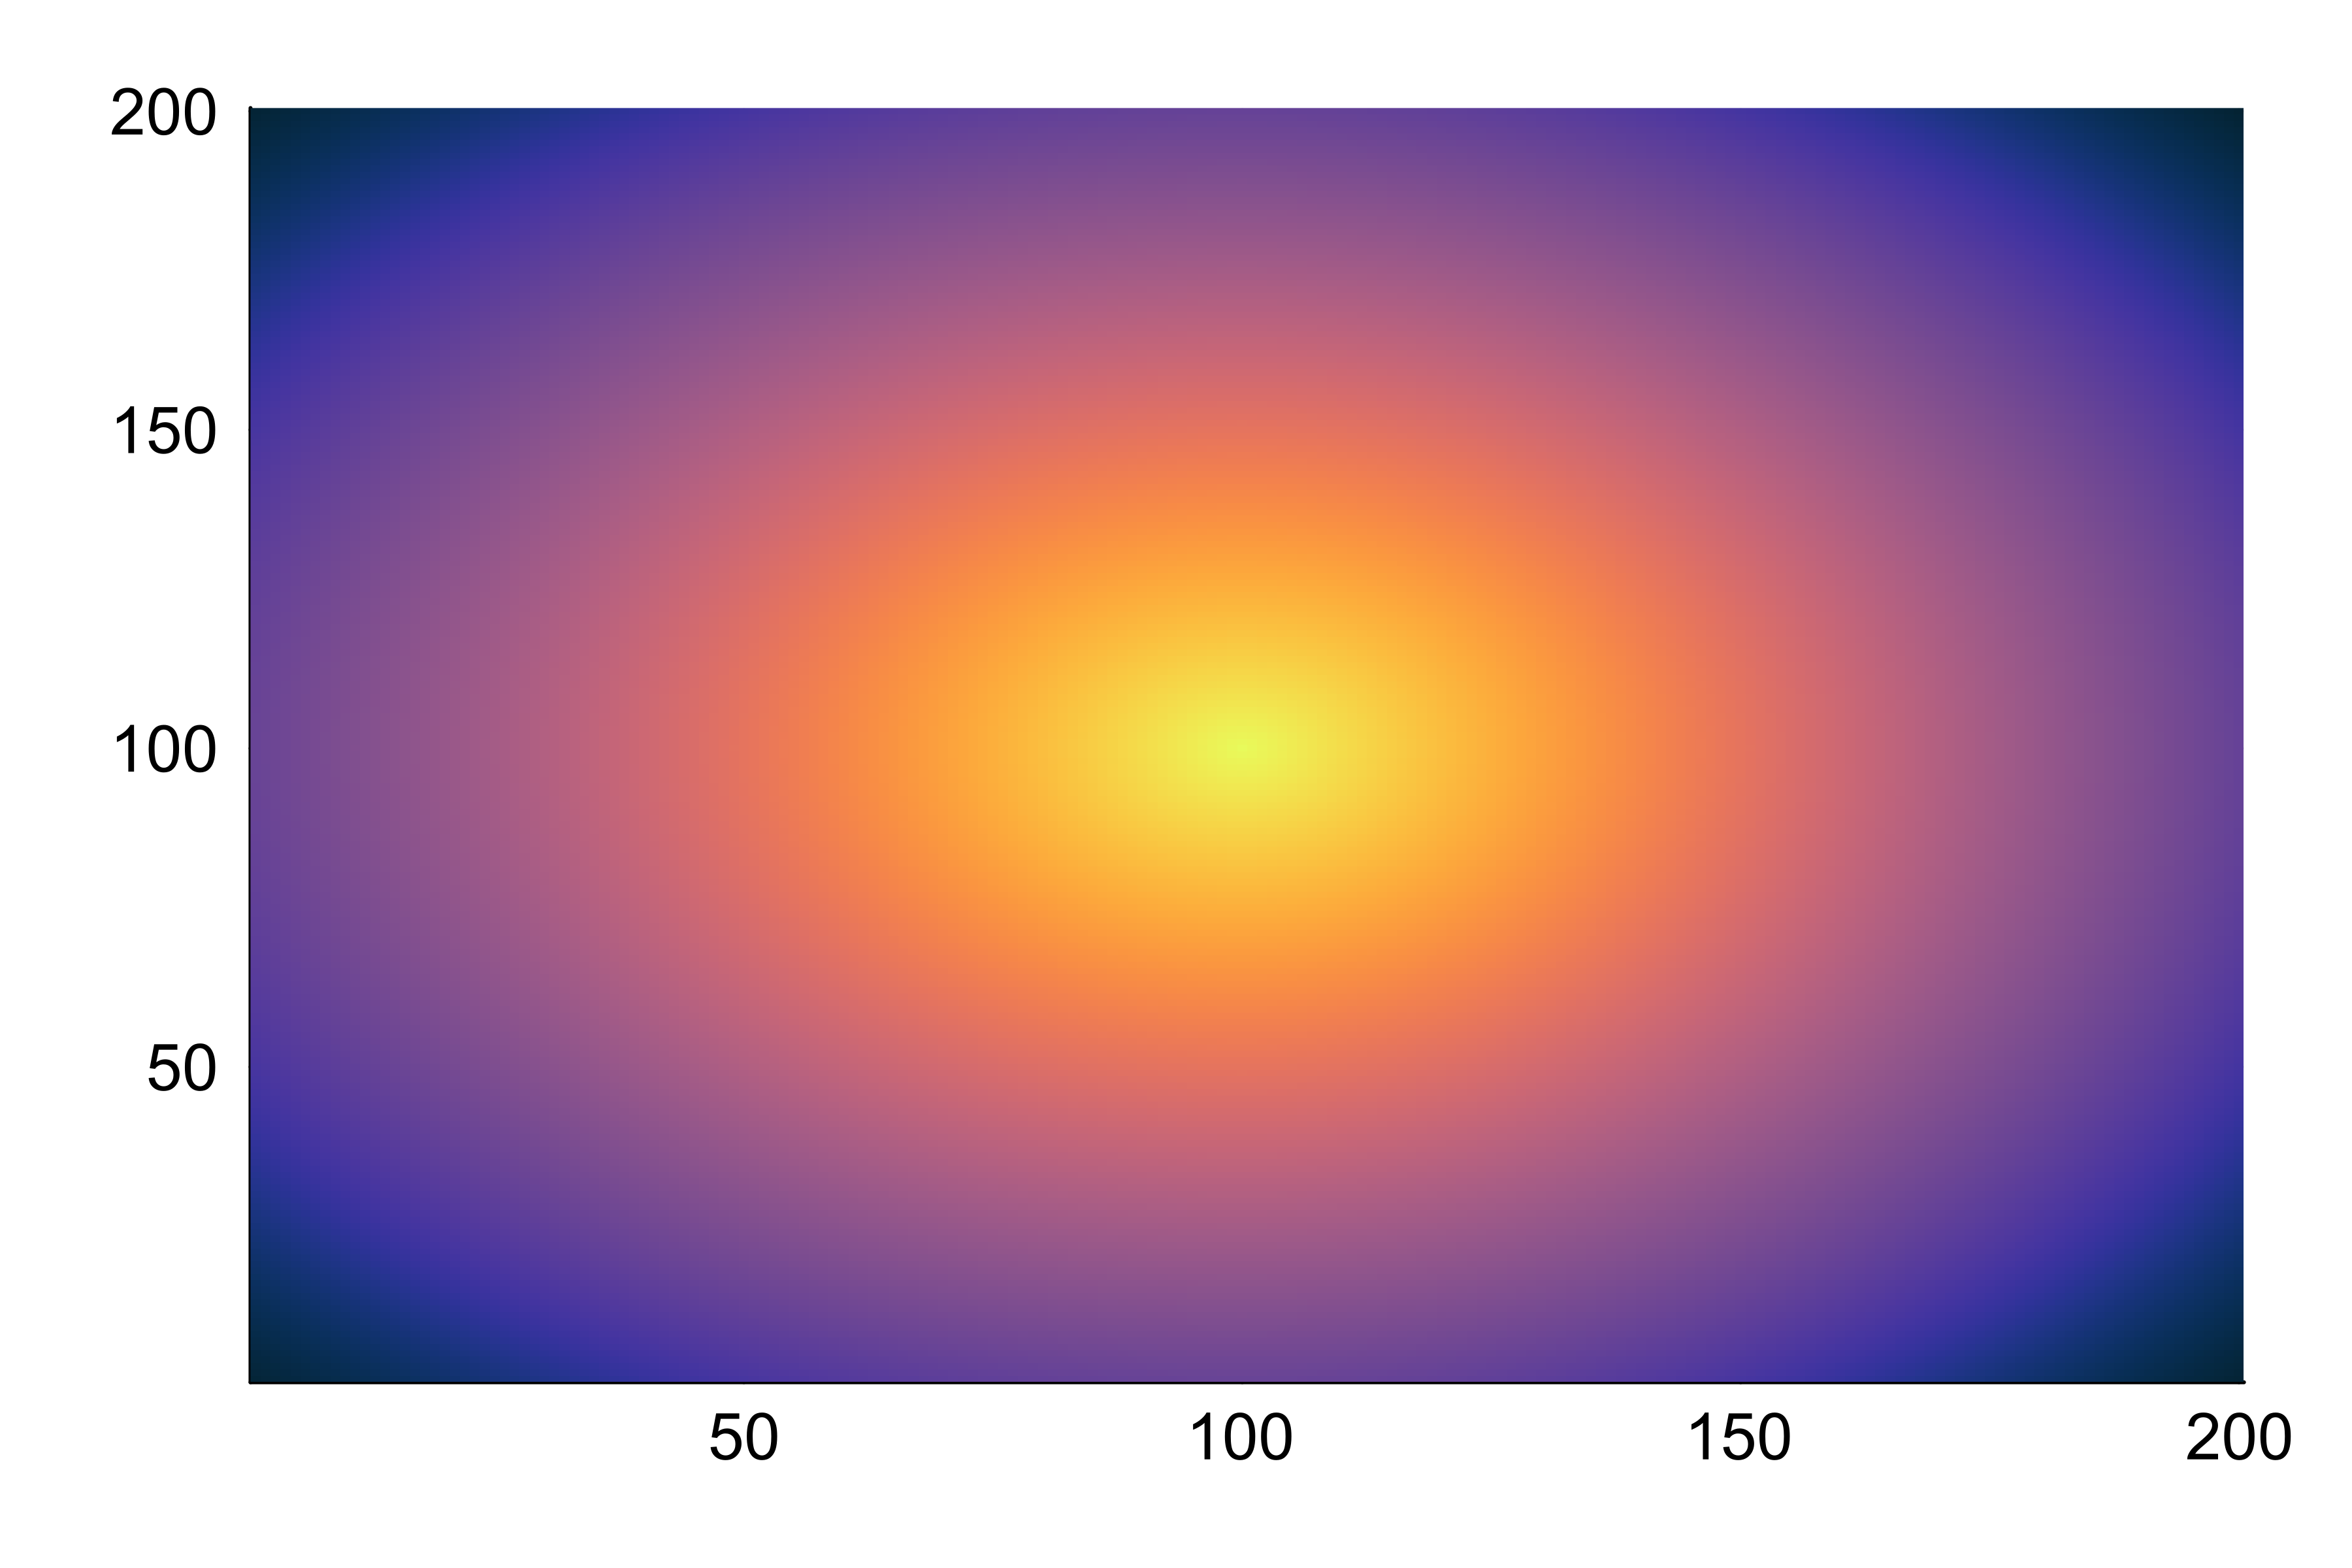

EV sample 2: [(100, 100), (100, 300)]


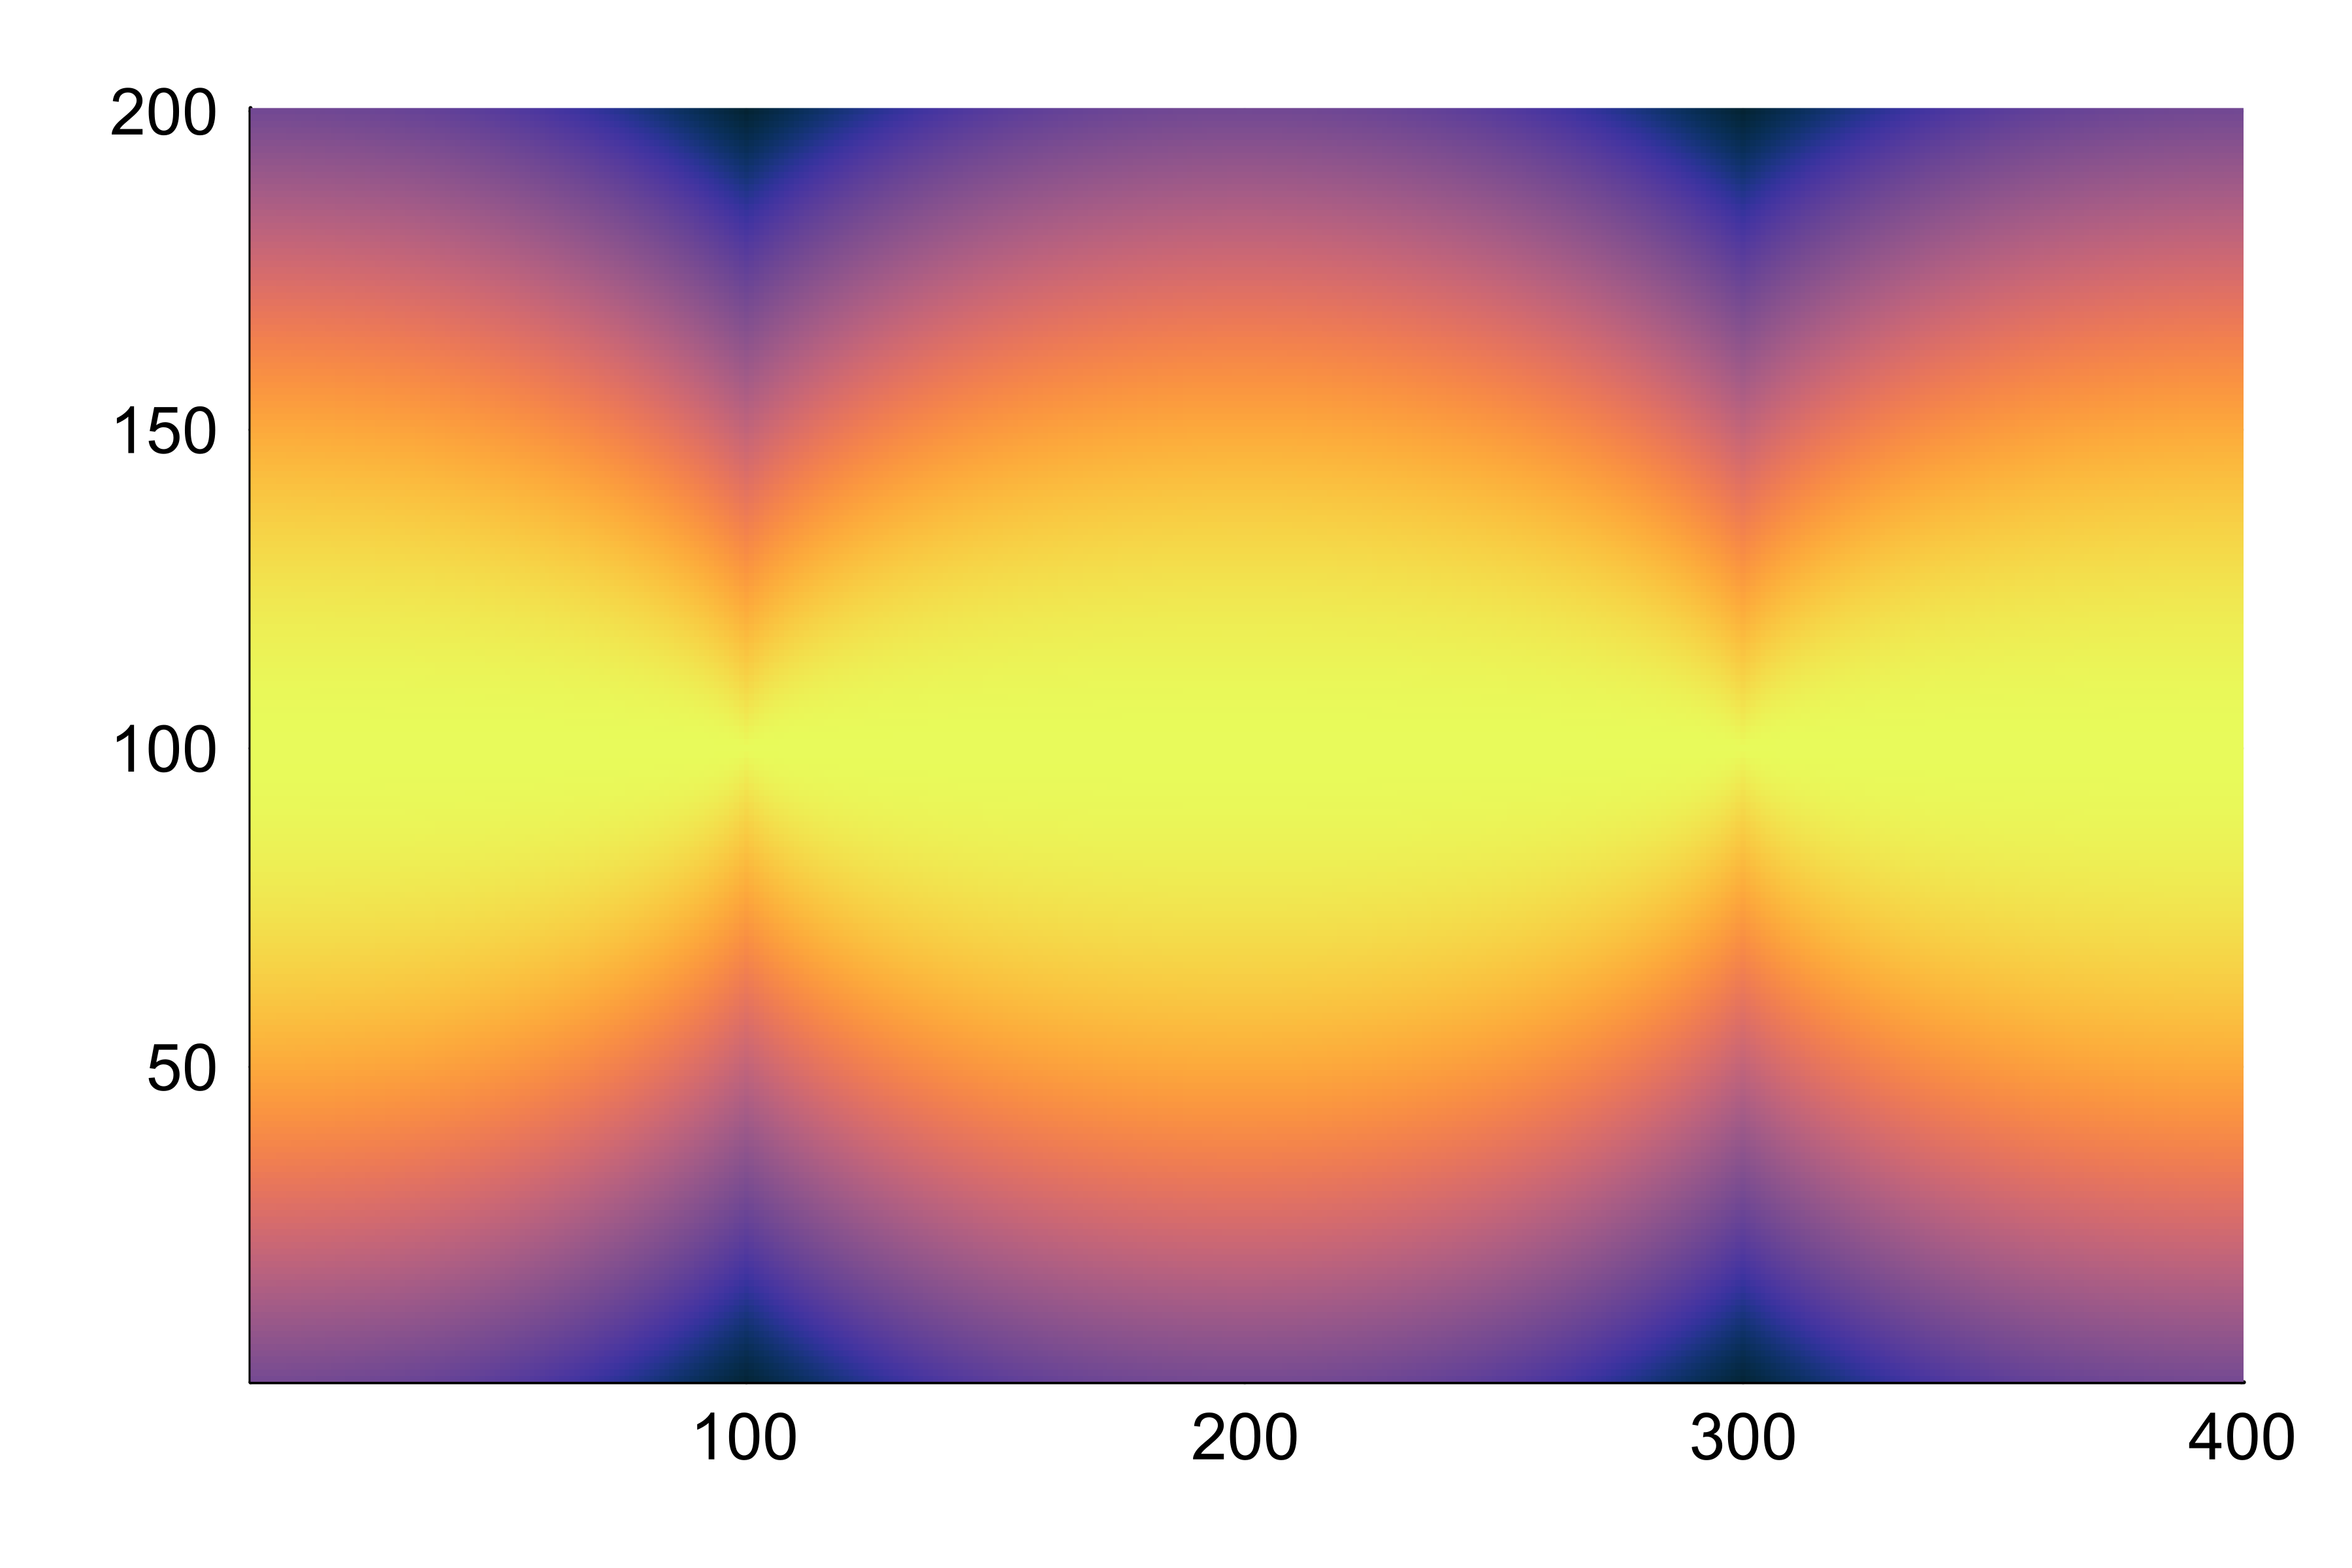

EV sample 3: [(120, 120), (80, 280)]


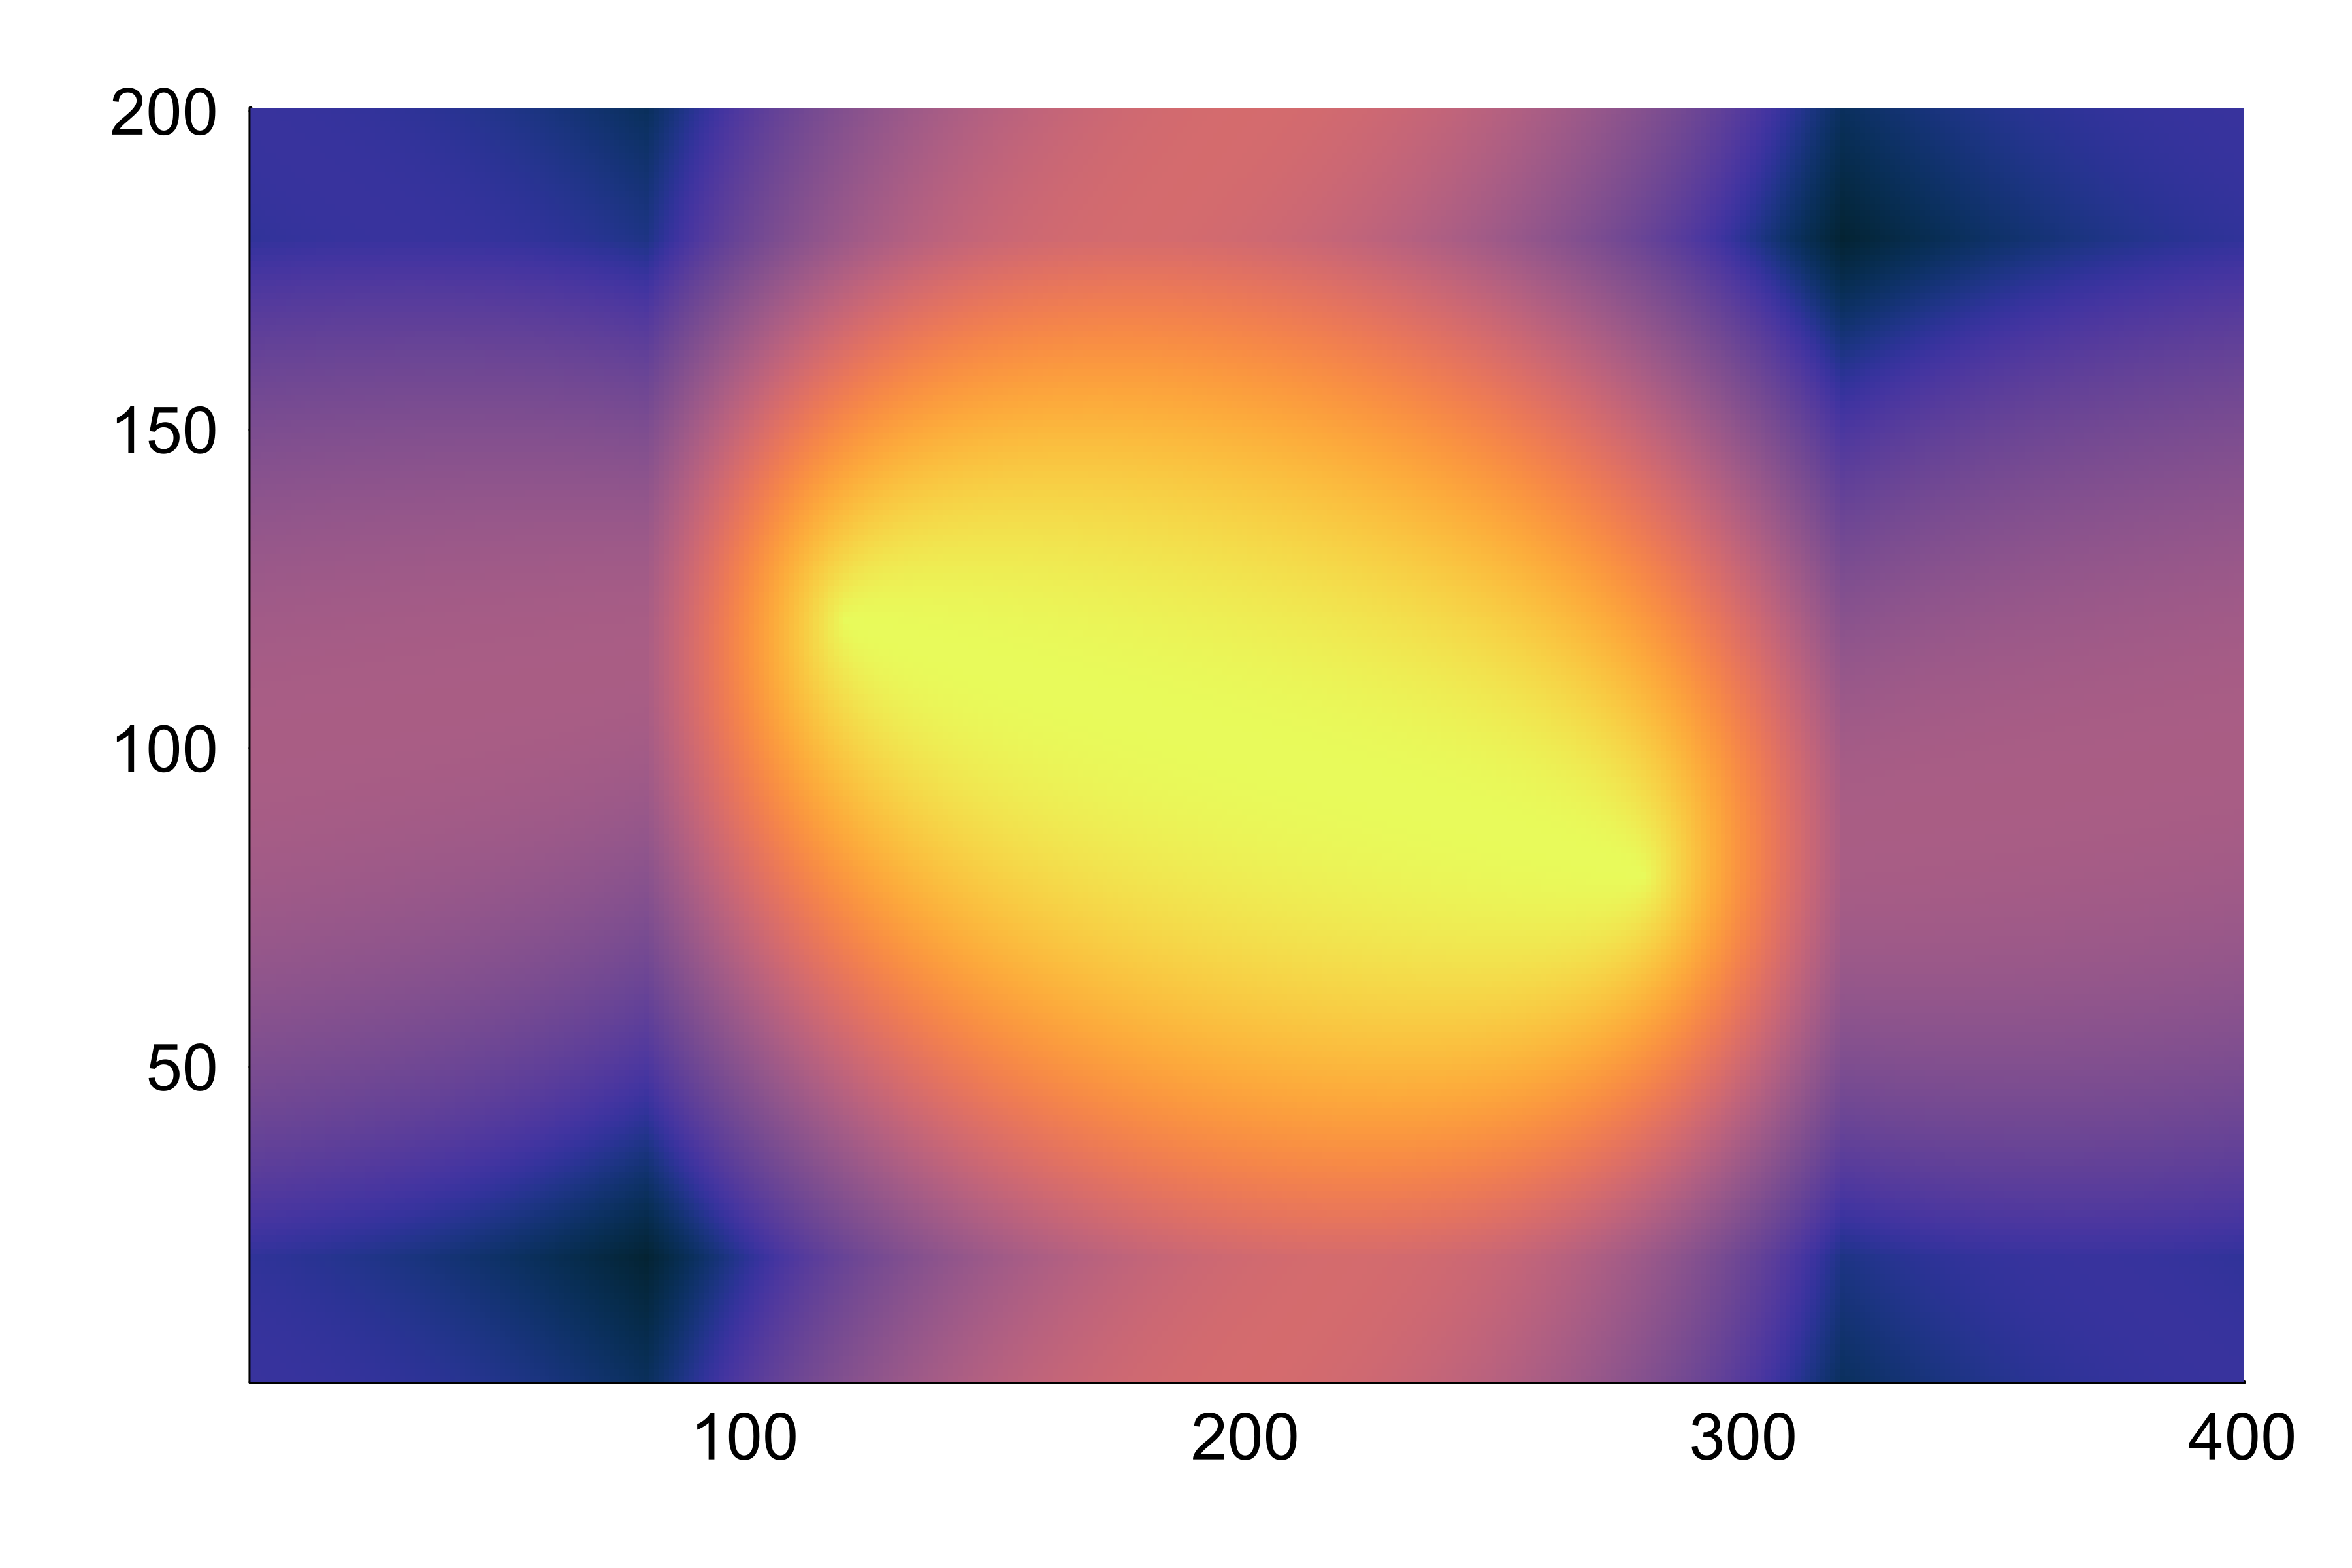

EV sample 4: [(80, 80), (120, 320)]


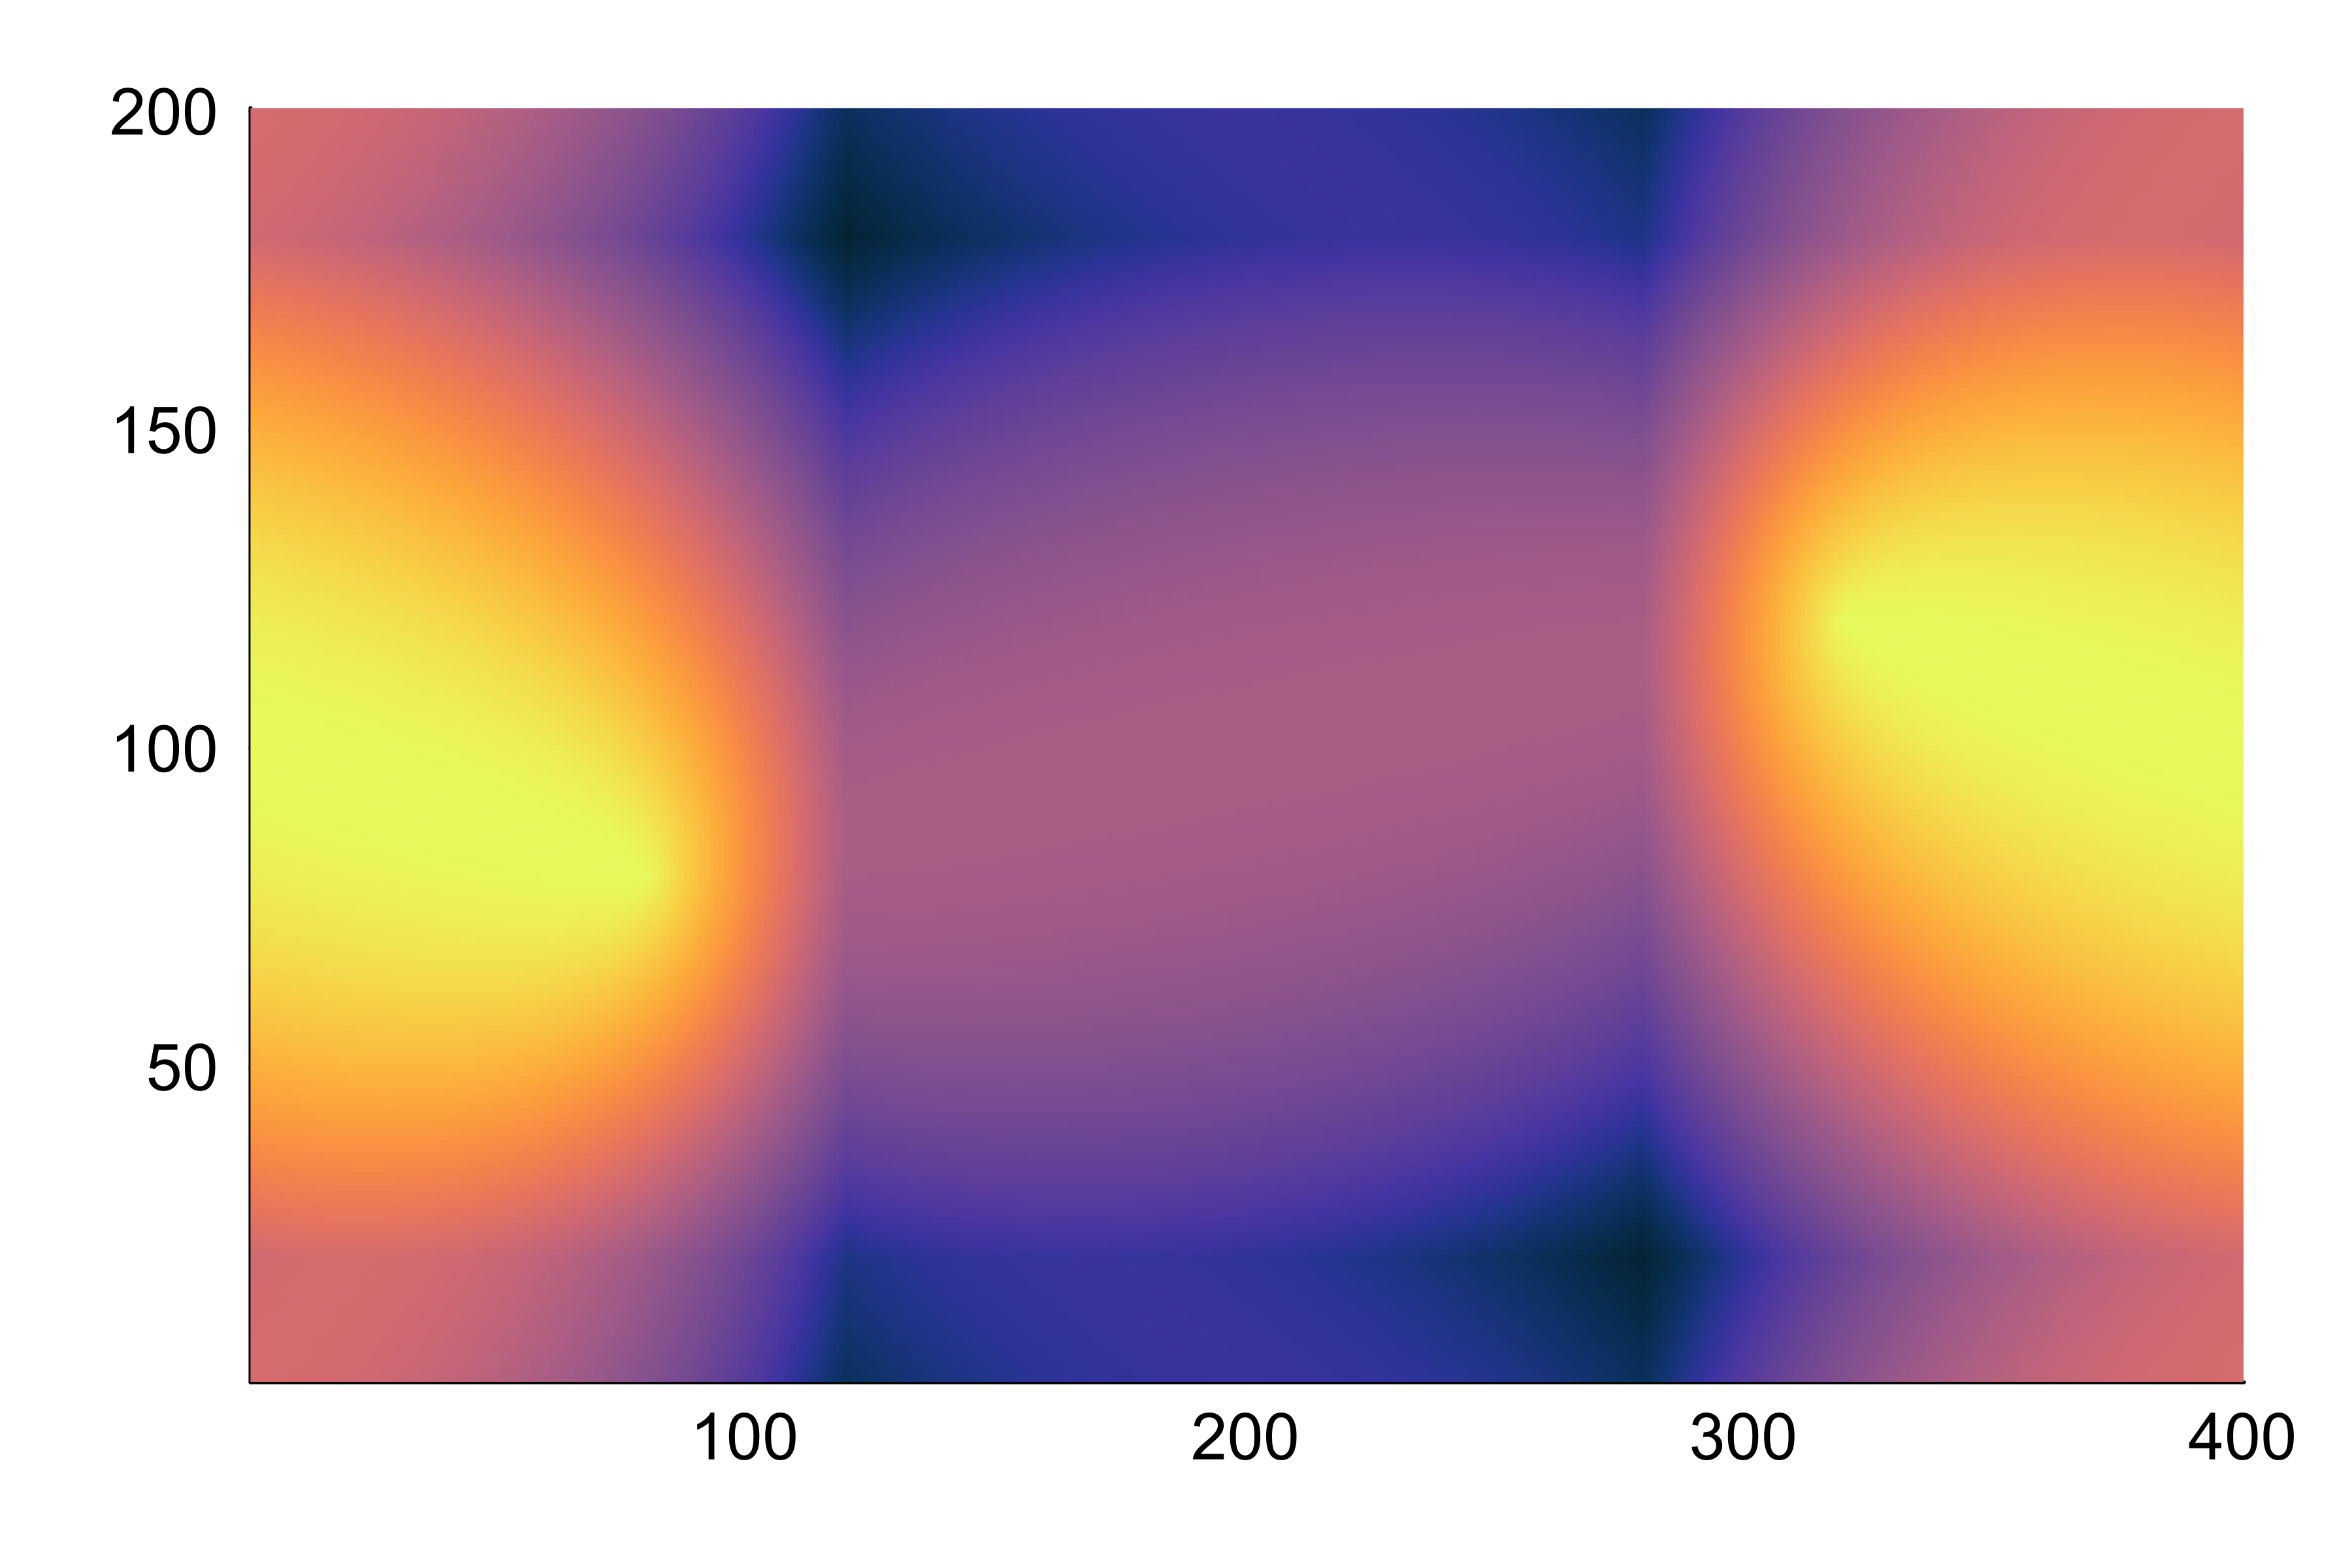

In [3]:
for (i, sor_vec) in enumerate([
        [(100, 100)],
        [(100, 100), (100, 300)],
        [(120, 120), (80, 280)],
        [(80, 80), (120, 320)]
])
    model = initialize_model(properties = ModelProperties(; dims = (200, 200 * length(sor_vec))))
    model.sor_vec = sor_vec
    set_θ_mat!(model)
    println("EV sample $(i): $(sor_vec)")
    display(heatmap(model.θ_mat, colormap = cgrad(:thermal, rev = true), colorbar = false))
    savefig("img/EV_sample_$(i).png")
end;